In [ ]:
import pandas as pd

# Read the CSV file
data = pd.read_csv('US_Crime_Data.csv')
print(data.head())
# Drop unrequired columns
columns_to_drop = ['Title', 'Organization', 'URL','Keyword','Summary']
data.drop(columns=columns_to_drop, inplace=True)
data.dropna(subset=['City', 'State'], inplace=True)
# Address missing values, outliers, and inconsistencies (example)
# Replace missing values with appropriate methods (mean, median, etc.)

# Check data types
print("Data Types:")
print(data.dtypes)


# Save preprocessed data to a new CSV file
data.to_csv('preprocessed_crime_data.csv', index=False)
# Save preprocessed data to a new CSV file


            Date                                              Title  \
0   2/13/17 9:01  Pizza Hut driver who killed co-worker with sho...   
1   2/13/17 9:37  Residents of NJ township receiving KKK promoti...   
2  2/13/17 15:37  House OKs bill to expand Kentucky's hate crime...   
3  2/13/17 16:56  Amid Protests, 'Blue Lives Matter' Bill Passes...   
4  2/13/17 18:37  Lafourche inmates charged with hate crimes in ...   

          Organization        City State  \
0         LGBTQ Nation     Phoenix    AZ   
1  New York Daily News         NaN   NaN   
2                FOX19  Cincinnati    OH   
3            89.3 WFPL  Louisville    KY   
4          Daily Comet   Thibodaux    LA   

                                                 URL Keyword Summary  
0  http://www.lgbtqnation.com/2017/02/man-accused...     NaN     NaN  
1  http://www.nydailynews.com/news/national/resid...     NaN     NaN  
2  http://www.fox19.com/story/34494432/house-oks-...     NaN     NaN  
3  http://wfpl.org/amid-

In [ ]:
import os
print("Current Working Directory:", os.getcwd())


Current Working Directory: C:\Users\srish\Downloads


In [ ]:
print(data.head())


            Date        City State
0   2/13/17 9:01     Phoenix    AZ
2  2/13/17 15:37  Cincinnati    OH
3  2/13/17 16:56  Louisville    KY
4  2/13/17 18:37   Thibodaux    LA
5  2/14/17 11:55       Davis    CA


In [ ]:
# Check for missing values in original data
print("Missing Values in Original Data:")
print(data.isnull().sum())


Missing Values in Original Data:
Date     0
City     0
State    0
dtype: int64


In [ ]:
import requests

# Function to get latitude and longitude for a city using Nominatim
def get_lat_lon(city):
    url = f"https://nominatim.openstreetmap.org/search?format=json&q={city}"
    response = requests.get(url).json()
    if response:
        return float(response[0]['lat']), float(response[0]['lon'])
    else:
        return None, None

# Example user input for source and destination cities
source_city = input("Enter source city: ")
destination_city = input("Enter destination city: ")

source_lat, source_lon = get_lat_lon(source_city)
destination_lat, destination_lon = get_lat_lon(destination_city)

if source_lat is None or destination_lat is None:
    print("Invalid city name or coordinates not found.")
    # Handle error scenario
else:
    print(f"Source coordinates: {source_lat}, {source_lon}")
    print(f"Destination coordinates: {destination_lat}, {destination_lon}")

Enter source city: Los Angeles
Enter destination city: New York
Source coordinates: 34.0536909, -118.242766
Destination coordinates: 40.7127281, -74.0060152


In [ ]:
# Function to get the safest route using OSRM
def get_safest_route(source_lat, source_lon, destination_lat, destination_lon):
    url = f"http://router.project-osrm.org/route/v1/driving/{source_lon},{source_lat};{destination_lon},{destination_lat}?overview=false&annotations=security"
    response = requests.get(url).json()
    print(response)
    if response and 'routes' in response:
        safest_route = response['routes'][0]
        print("Safest Route Details:")
        print(f"Distance: {safest_route['distance']} meters")
        print(f"Duration: {safest_route['duration']} seconds")
        print(f"Safest segment security score: {safest_route['legs'][0]['annotation']['security'][0]}")
        # Process other route details as needed
    else:
        print("No route found or error in retrieving data.")
        # Handle error scenario

# Get safest route details between the cities
get_safest_route(source_lat, source_lon, destination_lat, destination_lon)

{'message': 'Query string malformed close to position 91', 'code': 'InvalidQuery'}
No route found or error in retrieving data.


In [ ]:
import requests

# Function to get latitude and longitude for a city using Nominatim
def get_lat_lon(city):
    url = f"https://nominatim.openstreetmap.org/search?format=json&q={city}"
    response = requests.get(url).json()
    if response:
        return float(response[0]['lat']), float(response[0]['lon'])
    else:
        return None, None

# Function to get the safest route using OSRM
def get_safest_route(source_lat, source_lon, destination_lat, destination_lon):
    url = f"http://router.project-osrm.org/route/v1/driving/{source_lon},{source_lat};{destination_lon},{destination_lat}?overview=false&annotations=security"
    response = requests.get(url).json()
    if response and 'routes' in response and response['routes']:
        safest_route = response['routes'][0]
        print("Safest Route Details:")
        print(f"Distance: {safest_route['distance']} meters")
        print(f"Duration: {safest_route['duration']} seconds")
        print(f"Safest segment security score: {safest_route['legs'][0]['annotation']['security'][0]}")
        # Process other route details as needed
    else:
        print("No route found or error in retrieving data.")
        # Print the full response for debugging purposes
        print(response)
        # Handle error scenario

# Example user input for source and destination cities
source_city = input("Enter source city: ")
destination_city = input("Enter destination city: ")

source_lat, source_lon = get_lat_lon(source_city)
destination_lat, destination_lon = get_lat_lon(destination_city)

if source_lat is None or destination_lat is None:
    print("Invalid city name or coordinates not found.")
    # Handle error scenario
else:
    print(f"Source coordinates: {source_lat}, {source_lon}")
    print(f"Destination coordinates: {destination_lat}, {destination_lon}")
    # Get safest route details between the cities
    get_safest_route(source_lat, source_lon, destination_lat, destination_lon)



Enter source city: Los Angeles
Enter destination city: New York
Source coordinates: 34.0536909, -118.242766
Destination coordinates: 40.7127281, -74.0060152
No route found or error in retrieving data.
{'message': 'Query string malformed close to position 91', 'code': 'InvalidQuery'}


In [ ]:
# Load data
df = pd.read_csv('preprocessed_crime_data.csv')

# Group by city and state
grouped = df.groupby(['City', 'State'])

# Count records for each city + state
crime_counts = grouped.size().reset_index(name='crime_count')

# Calculate safety score
# Higher score = Safer city
crime_counts['safety_score'] = 1 / (crime_counts['crime_count'] + 1)

# Analyze safety scores
print(crime_counts.sort_values('safety_score', ascending=False))

              City       State  crime_count  safety_score
506    Long Island    New York            1      0.500000
535        Melrose          MA            1      0.500000
540         Merced  California            1      0.500000
544    Miami Beach          FL            1      0.500000
545     Miamisburg        Ohio            1      0.500000
..             ...         ...          ...           ...
789  San Francisco          CA          103      0.009615
173        Chicago          IL          110      0.009009
510    Los Angeles          CA          171      0.005814
934     Washington          DC          347      0.002874
611       New York          NY          716      0.001395

[1012 rows x 4 columns]


In [ ]:
# Merge the calculated crime counts and safety scores back to the original dataframe
df = pd.merge(df, crime_counts, on=['City', 'State'], how='left')

# Save the updated dataframe to a new CSV file
df.to_csv('final_crime_data.csv', index=False)


In [ ]:
# data = pd.read_csv('final_crime_data.csv')
# # Drop unrequired columns
# columns_to_drop = ['crime_count_y','safety_score_y']
# data.drop(columns=columns_to_drop, inplace=True)

# # Use the rename function to rename the columns
# df.rename(columns={'crime_count_x': 'Crime Count'}, inplace=True)
# df.rename(columns={'safety_score_x': 'Safety Score'}, inplace=True)
# data.to_csv('crime_data_ss.csv', index=False)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

from google.colab import drive
drive.mount('/content/drive')

data = pd.read_csv('/content/drive/MyDrive/crime_data_ss.csv')

# Load the prepared dataset with features and safety scores
# data = pd.read_csv('crime_data_ss.csv')

print(type(data['Date']))
# Data Cleaning
data = data[pd.to_numeric(data['safety_score_x'], errors='coerce').notnull()]

data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
reference_date = pd.to_datetime('1970-01-01')
data['no_of_days']= (data['Date']-reference_date).dt.days
filtered_data = data
filtered_data.dropna(subset=['Date'])
filtered_data.drop(['Date'],axis=1, inplace=True)

encoded_df = pd.get_dummies(filtered_data, columns=['City', 'State'], drop_first=True)
print(encoded_df.head())
#print(type(data['Date']))



# Split data into features (X) and target variable (y)
X = encoded_df.drop(columns=['safety_score_x'])
y = pd.to_numeric(encoded_df['safety_score_x'])  # Convert to numeric



# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a machine learning model (e.g., RandomForestRegressor)
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Evaluate model performance
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")


Mounted at /content/drive
<class 'pandas.core.series.Series'>
   crime_count_x  safety_score_x  no_of_days  City_Aberdeen  City_Abernathy  \
0             41        0.023810       17210              0               0   
1             15        0.062500       17210              0               0   
2             14        0.066667       17210              0               0   
3              1        0.500000       17210              0               0   
4              5        0.166667       17211              0               0   

   City_Abilene  City_Adelphi  City_Akron  City_Albany  City_Albuquerque  ...  \
0             0             0           0            0                 0  ...   
1             0             0           0            0                 0  ...   
2             0             0           0            0                 0  ...   
3             0             0           0            0                 0  ...   
4             0             0           0            0    

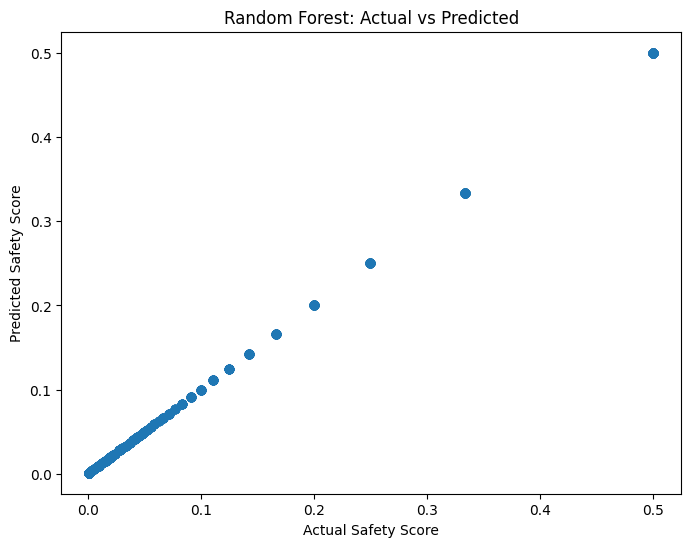

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions)
plt.xlabel('Actual Safety Score')
plt.ylabel('Predicted Safety Score')
plt.title('Random Forest: Actual vs Predicted')
plt.show()


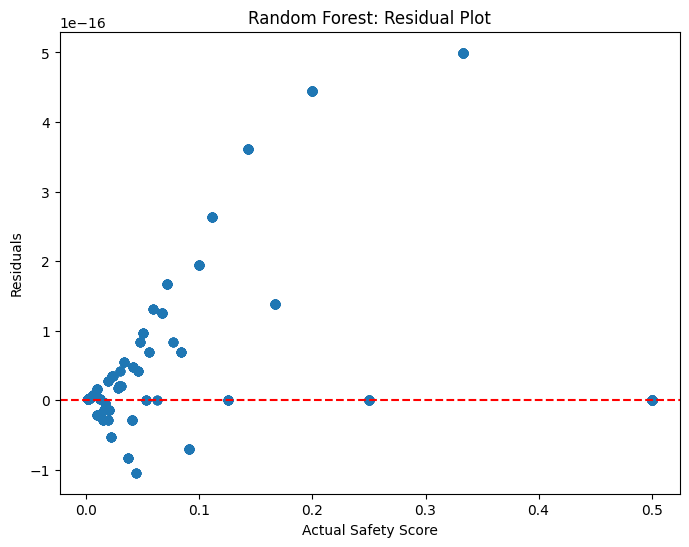

In [ ]:
residuals = y_test - predictions

plt.figure(figsize=(8, 6))
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Actual Safety Score')
plt.ylabel('Residuals')
plt.title('Random Forest: Residual Plot')
plt.show()


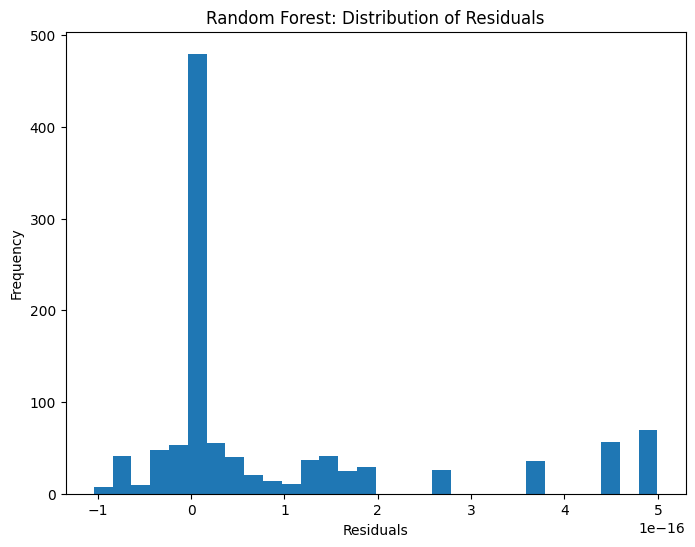

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Random Forest: Distribution of Residuals')
plt.show()


In [ ]:
filtered_data.columns

Index(['City', 'State', 'crime_count_x', 'safety_score_x', 'no_of_days'], dtype='object')

In [ ]:
# Example of binning into three categories (Low, Medium, High)
labels = ['Low', 'Medium', 'High']
bins = pd.qcut(y, q=3, labels=labels)

# Train-test split for classification
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X, bins, test_size=0.2, random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Train a RandomForestClassifier for classification
clf = RandomForestClassifier()
clf.fit(X_train_cls, y_train_cls)

# Predict using the classifier
predictions_cls = clf.predict(X_test_cls)

# Calculate classification metrics
accuracy = accuracy_score(y_test_cls, predictions_cls)
precision = precision_score(y_test_cls, predictions_cls, average='weighted')
recall = recall_score(y_test_cls, predictions_cls, average='weighted')
f1 = f1_score(y_test_cls, predictions_cls, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


In [ ]:
from sklearn.linear_model import LinearRegression

# Assuming 'encoded_df' contains your preprocessed data as in your previous code
# Split into features (X) and target variable (y)
X = encoded_df.drop(columns=['safety_score_x'])
y = encoded_df['safety_score_x']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Evaluate model performance
linear_predictions = linear_model.predict(X_test)
linear_mse = mean_squared_error(y_test, linear_predictions)
print(f"Linear Regression Mean Squared Error: {linear_mse}")


Linear Regression Mean Squared Error: 0.009739266194285731


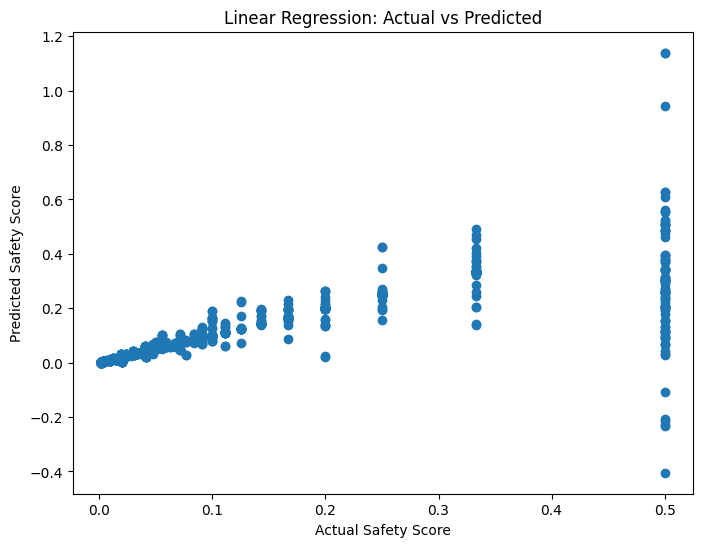

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, linear_predictions)
plt.xlabel('Actual Safety Score')
plt.ylabel('Predicted Safety Score')
plt.title('Linear Regression: Actual vs Predicted')
plt.show()


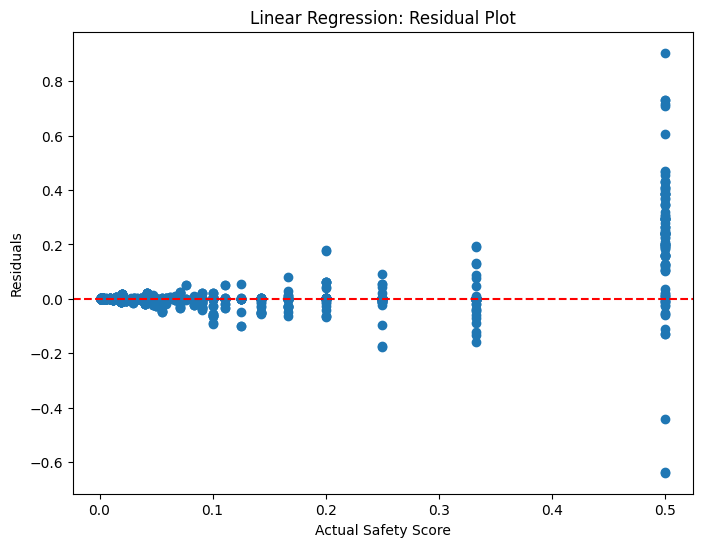

In [ ]:
residuals = y_test - linear_predictions

plt.figure(figsize=(8, 6))
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Actual Safety Score')
plt.ylabel('Residuals')
plt.title('Linear Regression: Residual Plot')
plt.show()


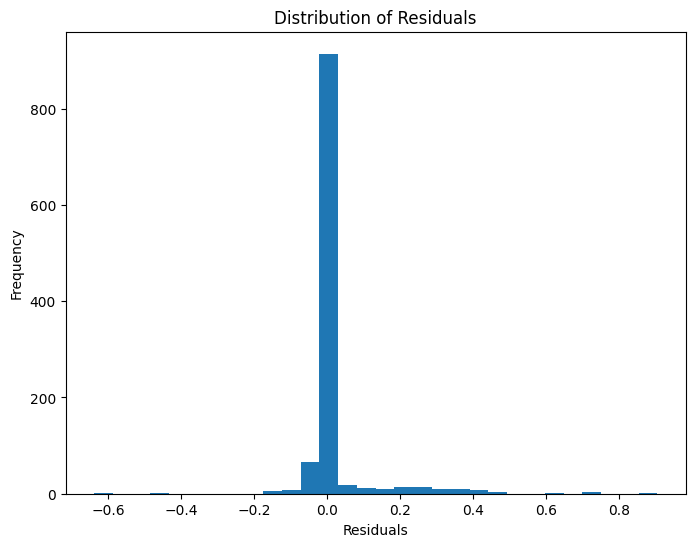

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler

# Assuming 'X_train' and 'X_test' are your feature sets
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a Linear Regression model on scaled data
linear_model_scaled = LinearRegression()
linear_model_scaled.fit(X_train_scaled, y_train)

# Predict and evaluate on the scaled test data
linear_predictions_scaled = linear_model_scaled.predict(X_test_scaled)
linear_mse_scaled = mean_squared_error(y_test, linear_predictions_scaled)
print(f"Scaled Linear Regression Mean Squared Error: {linear_mse_scaled}")


Scaled Linear Regression Mean Squared Error: 8.861158540803825e+23


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Assuming 'linear_predictions' are the predictions from Linear Regression
# Binning the predicted values
labels = ['Low', 'Medium', 'High']
bins_linear = pd.qcut(linear_predictions, q=3, labels=labels)

# Convert actual y_test values into categorical bins
bins_actual = pd.qcut(y_test, q=3, labels=labels)

# Calculate classification metrics
accuracy_linear = accuracy_score(bins_actual, bins_linear)
precision_linear = precision_score(bins_actual, bins_linear, average='weighted')
recall_linear = recall_score(bins_actual, bins_linear, average='weighted')
f1_linear = f1_score(bins_actual, bins_linear, average='weighted')

print(f"Linear Regression - Accuracy: {accuracy_linear}")
print(f"Linear Regression - Precision: {precision_linear}")
print(f"Linear Regression - Recall: {recall_linear}")
print(f"Linear Regression - F1 Score: {f1_linear}")


Linear Regression - Accuracy: 0.9290263876251137
Linear Regression - Precision: 0.9300412915935347
Linear Regression - Recall: 0.9290263876251137
Linear Regression - F1 Score: 0.9293504538122314


In [ ]:
pip install xgboost

In [ ]:
import xgboost as xgb

# Convert data to DMatrix format for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set XGBoost parameters
params = {
    'max_depth': 3,
    'eta': 0.1,
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse'
}

# Training the XGBoost model
xgb_model = xgb.train(params, dtrain, num_boost_round=1000, early_stopping_rounds=5, evals=[(dtest, 'test')])

# Predict using the XGBoost model
xgb_predictions = xgb_model.predict(dtest)

# Evaluate model performance
xgb_mse = mean_squared_error(y_test, xgb_predictions)
print(f"XGBoost Mean Squared Error: {xgb_mse}")


[0]	test-rmse:0.13624
[1]	test-rmse:0.12274
[2]	test-rmse:0.11061
[3]	test-rmse:0.09963
[4]	test-rmse:0.08977
[5]	test-rmse:0.08091
[6]	test-rmse:0.07288
[7]	test-rmse:0.06568
[8]	test-rmse:0.05920
[9]	test-rmse:0.05332
[10]	test-rmse:0.04803
[11]	test-rmse:0.04328
[12]	test-rmse:0.03902
[13]	test-rmse:0.03515
[14]	test-rmse:0.03168
[15]	test-rmse:0.02854
[16]	test-rmse:0.02572
[17]	test-rmse:0.02317
[18]	test-rmse:0.02089
[19]	test-rmse:0.01882
[20]	test-rmse:0.01696
[21]	test-rmse:0.01528
[22]	test-rmse:0.01378
[23]	test-rmse:0.01242
[24]	test-rmse:0.01119
[25]	test-rmse:0.01009
[26]	test-rmse:0.00909
[27]	test-rmse:0.00820
[28]	test-rmse:0.00739
[29]	test-rmse:0.00666
[30]	test-rmse:0.00601
[31]	test-rmse:0.00541
[32]	test-rmse:0.00488
[33]	test-rmse:0.00440
[34]	test-rmse:0.00397
[35]	test-rmse:0.00358
[36]	test-rmse:0.00323
[37]	test-rmse:0.00292
[38]	test-rmse:0.00263
[39]	test-rmse:0.00238
[40]	test-rmse:0.00215
[41]	test-rmse:0.00194
[42]	test-rmse:0.00175
[43]	test-rmse:0.0015

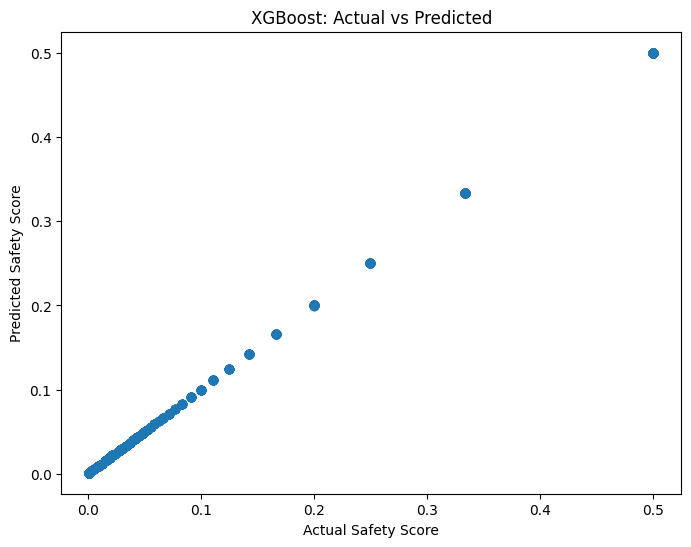

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, xgb_predictions)
plt.xlabel('Actual Safety Score')
plt.ylabel('Predicted Safety Score')
plt.title('XGBoost: Actual vs Predicted')
plt.show()


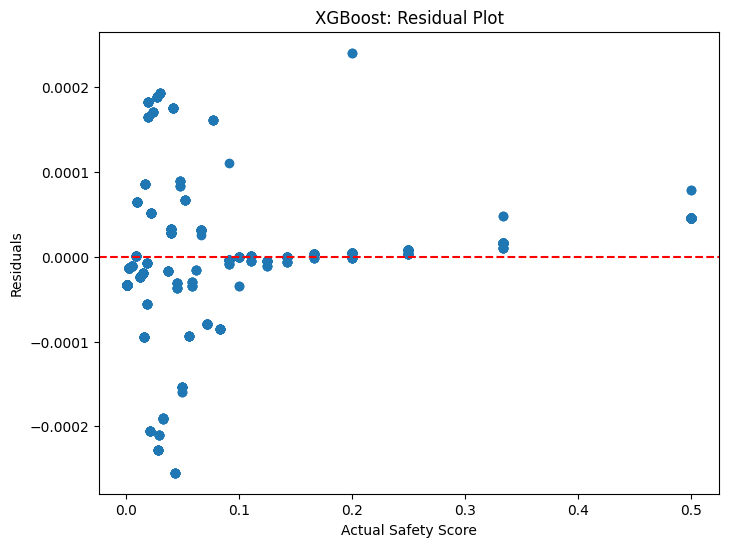

In [ ]:
xgb_residuals = y_test - xgb_predictions

plt.figure(figsize=(8, 6))
plt.scatter(y_test, xgb_residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Actual Safety Score')
plt.ylabel('Residuals')
plt.title('XGBoost: Residual Plot')
plt.show()

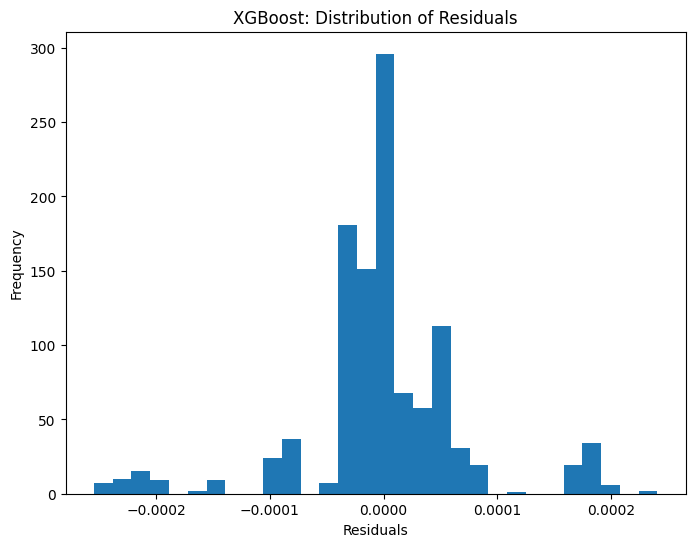

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(xgb_residuals, bins=30)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('XGBoost: Distribution of Residuals')
plt.show()


In [ ]:
# Assuming 'linear_predictions' and 'xgb_predictions' are predicted safety scores
# Binning into three categories (Low, Medium, High) based on quantiles
labels = ['Low', 'Medium', 'High']
# linear_bins = pd.qcut(linear_predictions, q=3, labels=labels)
xgb_bins = pd.qcut(xgb_predictions, q=3, labels=labels)

accuracy_xgb = accuracy_score(bins_actual, xgb_bins)
# Calculate classification metrics for XGBoost
xgb_precision = precision_score(y_test_cls, xgb_bins, average='weighted')
xgb_recall = recall_score(y_test_cls, xgb_bins, average='weighted')
xgb_f1 = f1_score(y_test_cls, xgb_bins, average='weighted')

accuracy_xgb = accuracy_score(bins_actual, xgb_bins)

print("\nXGBoost Metrics:")
print(f"Precision: {xgb_precision}")
print(f"Recall: {xgb_recall}")
print(f"F1 Score: {xgb_f1}")
print(f"Accuracy: {accuracy_xgb}")




XGBoost Metrics:
Precision: 0.9827960838715772
Recall: 0.9818016378525932
F1 Score: 0.981922523630609
Accuracy: 0.9909008189262967


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Calculate MSE for Linear Regression
linear_mse = mean_squared_error(y_test, linear_predictions)

# Calculate MSE for RandomForestRegressor
rf_mse = mean_squared_error(y_test, predictions)

# Calculate MSE for XGBoost
xgb_mse = mean_squared_error(y_test, xgb_predictions)

# Calculate RMSE for all models
linear_rmse = np.sqrt(linear_mse)
rf_rmse = np.sqrt(rf_mse)
xgb_rmse = np.sqrt(xgb_mse)

# Calculate R-squared for all models
linear_r2 = r2_score(y_test, linear_predictions)
rf_r2 = r2_score(y_test, predictions)
xgb_r2 = r2_score(y_test, xgb_predictions)

print(f"Linear Regression - MSE: {linear_mse}, RMSE: {linear_rmse}, R-squared: {linear_r2}")
print(f"Random Forest - MSE: {rf_mse}, RMSE: {rf_rmse}, R-squared: {rf_r2}")
print(f"XGBoost - MSE: {xgb_mse}, RMSE: {xgb_rmse}, R-squared: {xgb_r2}")


Linear Regression - MSE: 0.009739266194285731, RMSE: 0.098687720585115, R-squared: 0.5739154792802017
Random Forest - MSE: 3.5482089262552615e-32, RMSE: 1.8836690065548302e-16, R-squared: 1.0
XGBoost - MSE: 5.001665407181007e-09, RMSE: 7.07224533453203e-05, R-squared: 0.9999997811814396


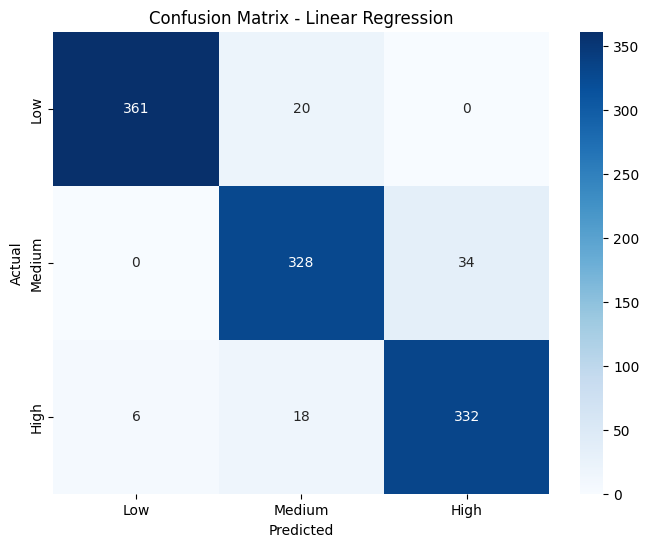

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate confusion matrix for Linear Regression
conf_matrix_linear = confusion_matrix(bins_actual, bins_linear, labels=labels)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_linear, annot=True, cmap='Blues', fmt='d', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Linear Regression')
plt.show()


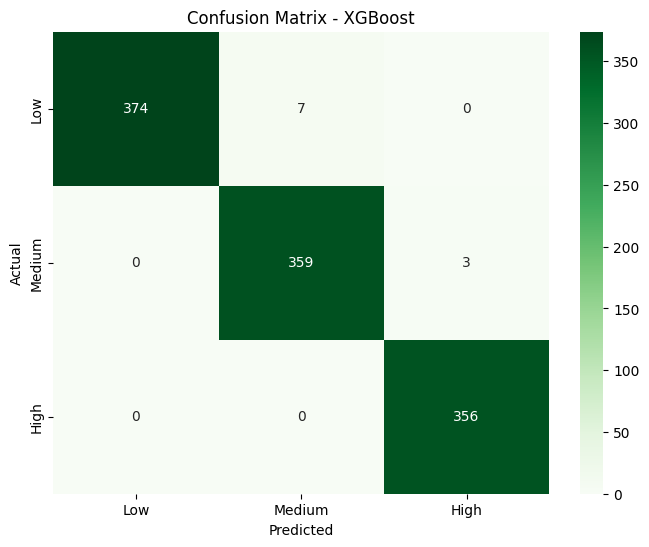

In [ ]:
# Generate confusion matrix for XGBoost
conf_matrix_xgb = confusion_matrix(bins_actual, bins_xgb, labels=labels)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_xgb, annot=True, cmap='Greens', fmt='d', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - XGBoost')
plt.show()


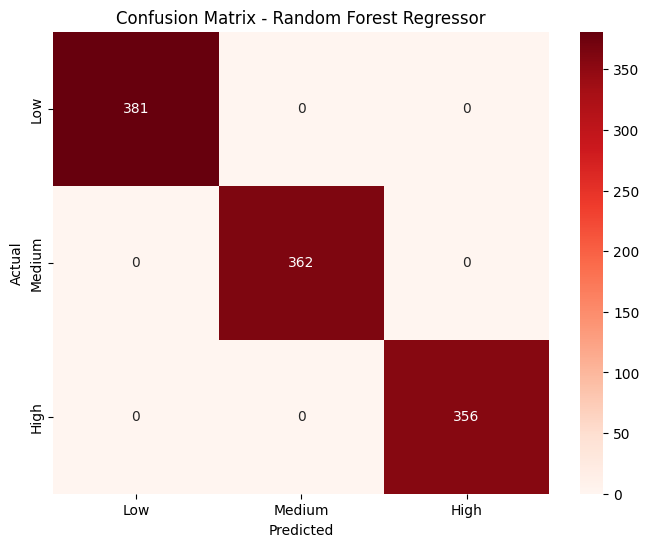

In [ ]:
# Assuming 'predictions' are the predictions from RandomForestRegressor
# Binning the predicted values
bins_rf = pd.qcut(predictions, q=3, labels=labels)

# Generate confusion matrix for Random Forest Regressor
conf_matrix_rf = confusion_matrix(bins_actual, bins_rf, labels=labels)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, cmap='Reds', fmt='d', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest Regressor')
plt.show()
